In [1]:
import FR_mainCode as fr
import FR_mainCode_plus as frplus
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle #to unpickle


C:\Users\celia\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\celia\GitHub\ModelRepo_MoulinShapeStorage_Paper\Constant_Qin\FR_mainCode_plus.py:271: RuntimeWarning: divide by zero encountered in double_scalars
  oscillation = 2*np.pi/beta * TauRes #(day)
C:\Users\celia\GitHub\ModelRepo_MoulinShapeStorage_Paper\Constant_Qin\FR_mainCode_plus.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  oscillation_fit = 2*np.pi/beta_fit * TauRes #(day)
C:\Users\celia\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\celia\GitHub\ModelRepo_MoulinShapeStorage_Paper\Constant_Qin\FR_mainCode_plus.py:271: RuntimeWarning: divide by zero encountered in double_scalars
  osci

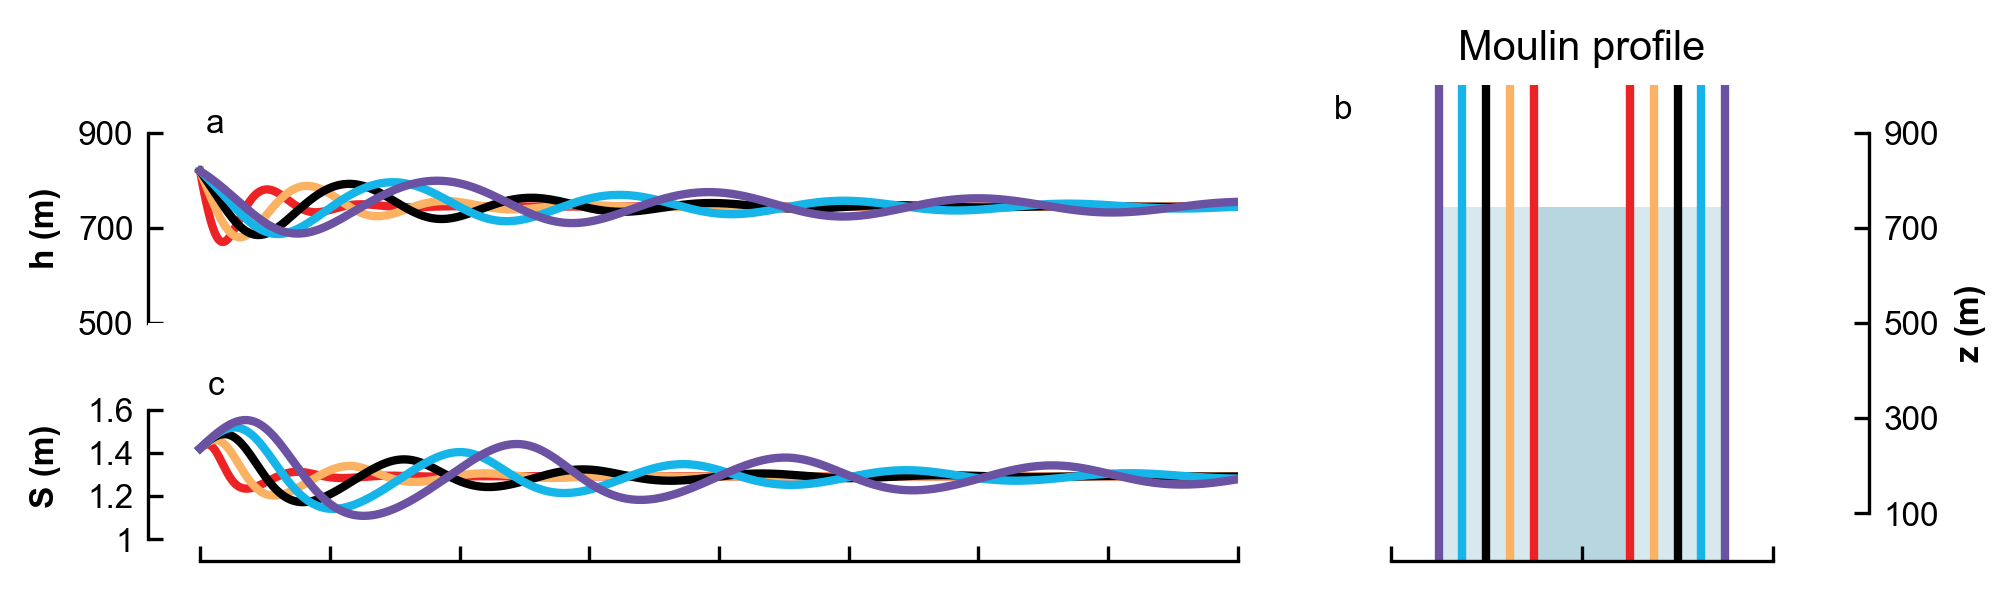

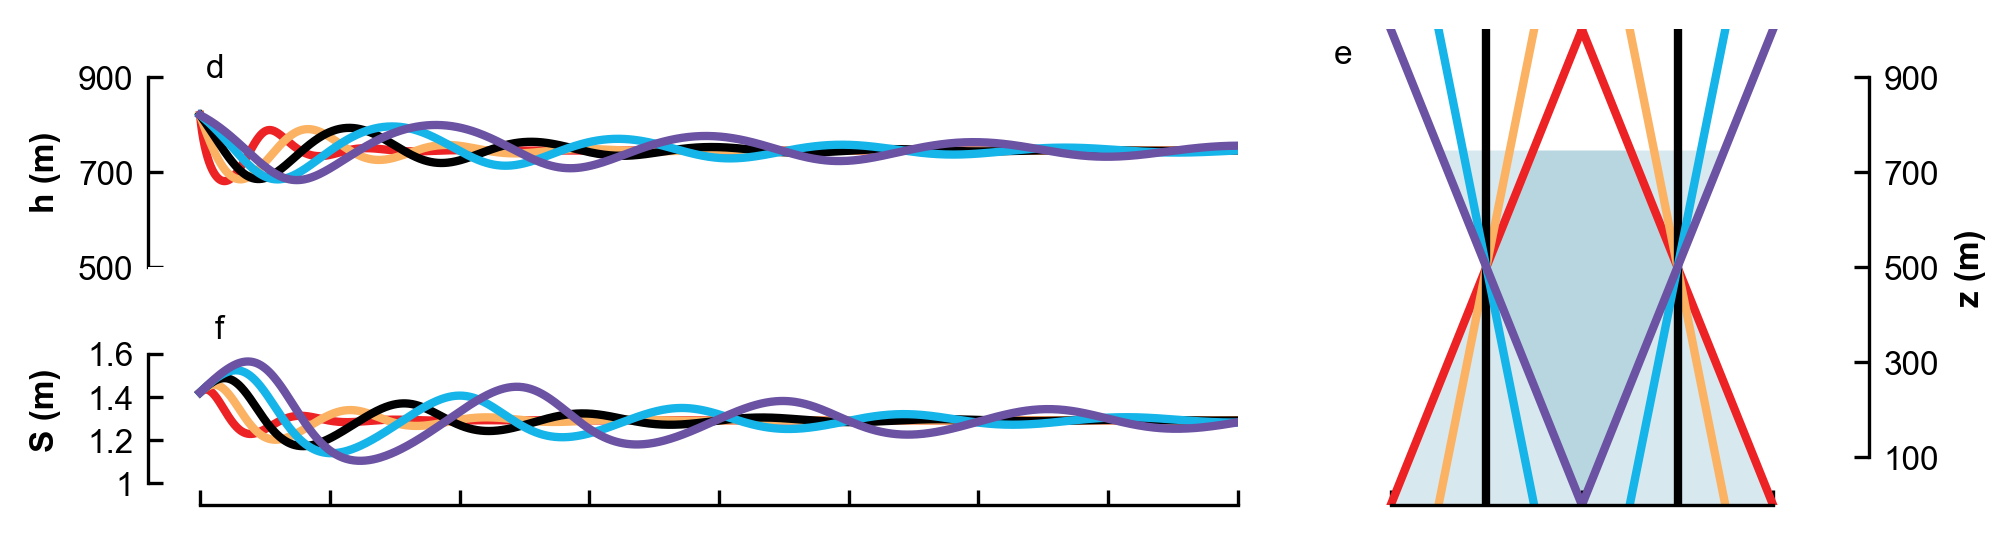

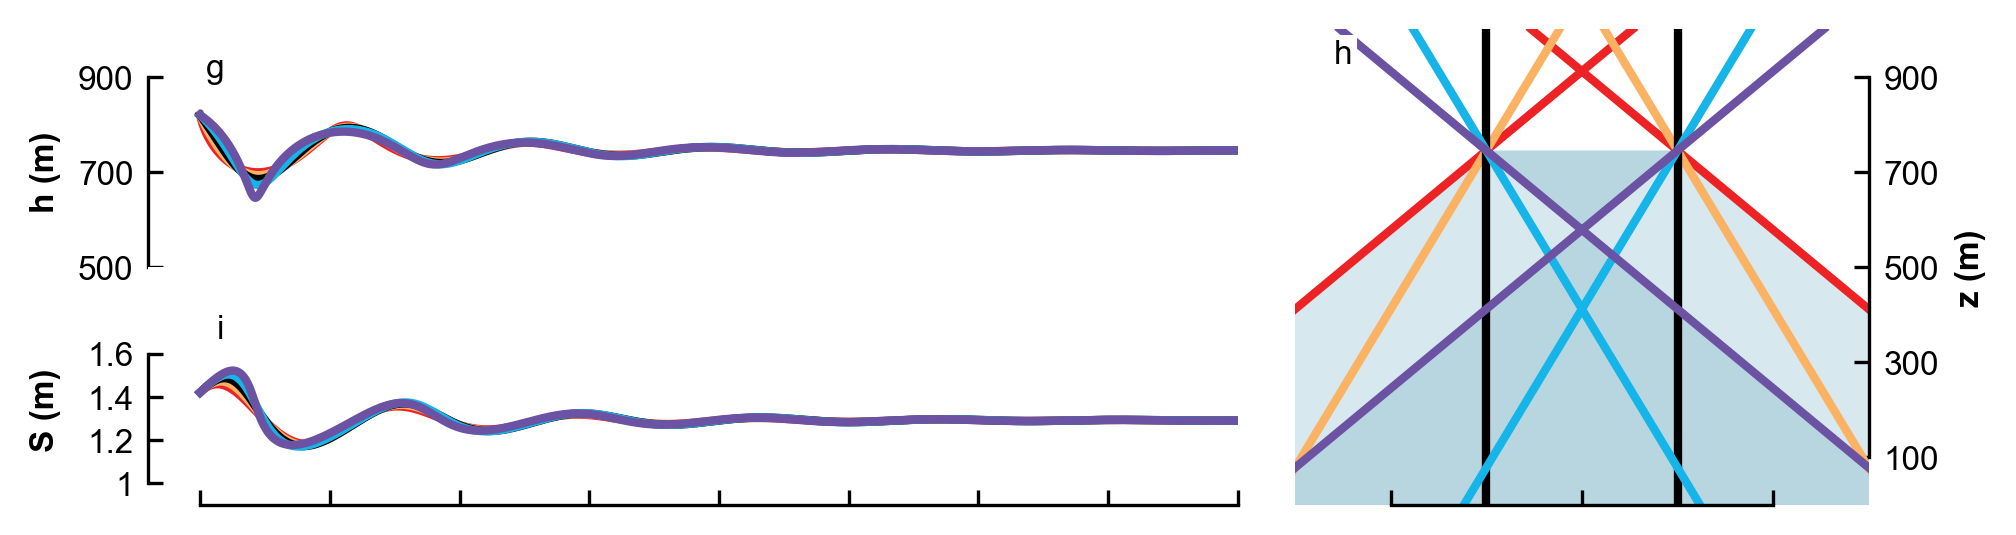

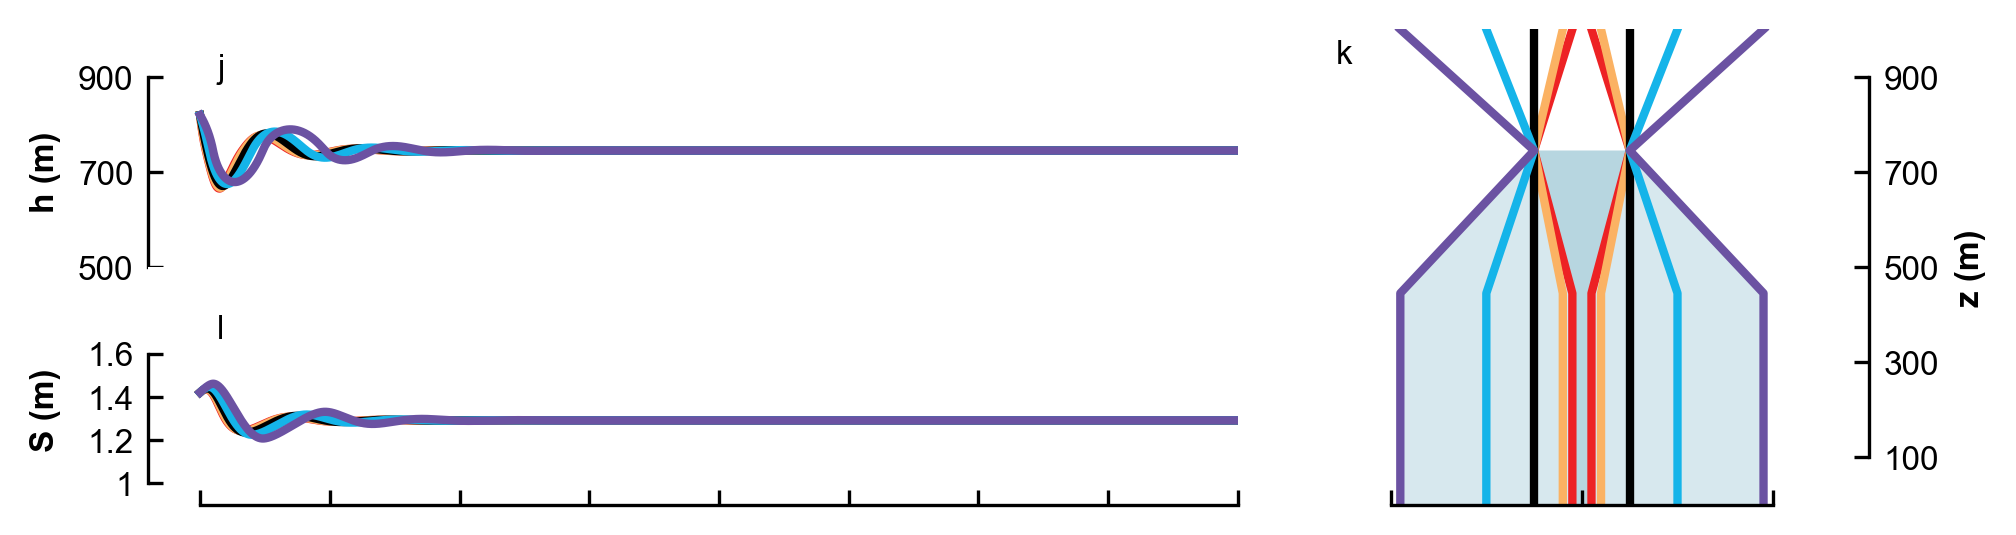

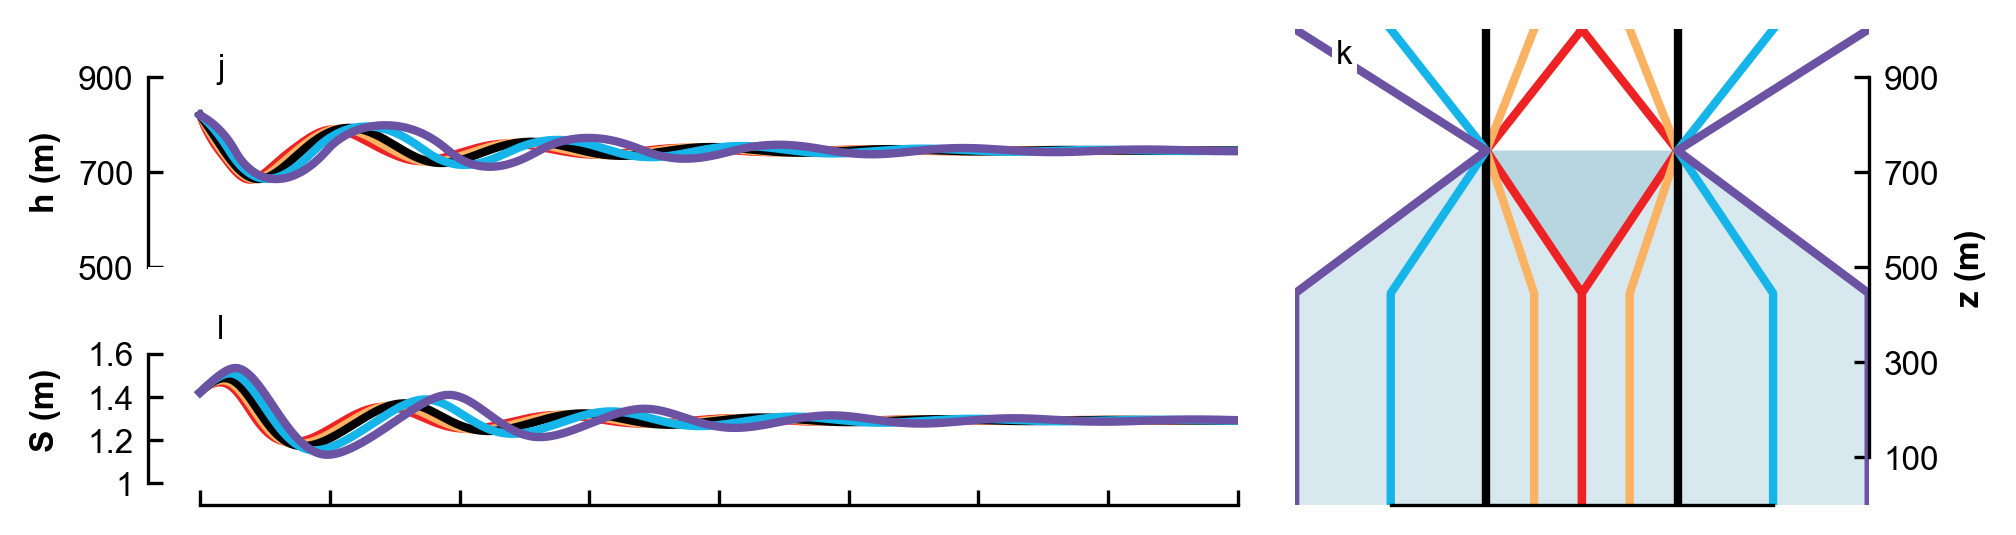

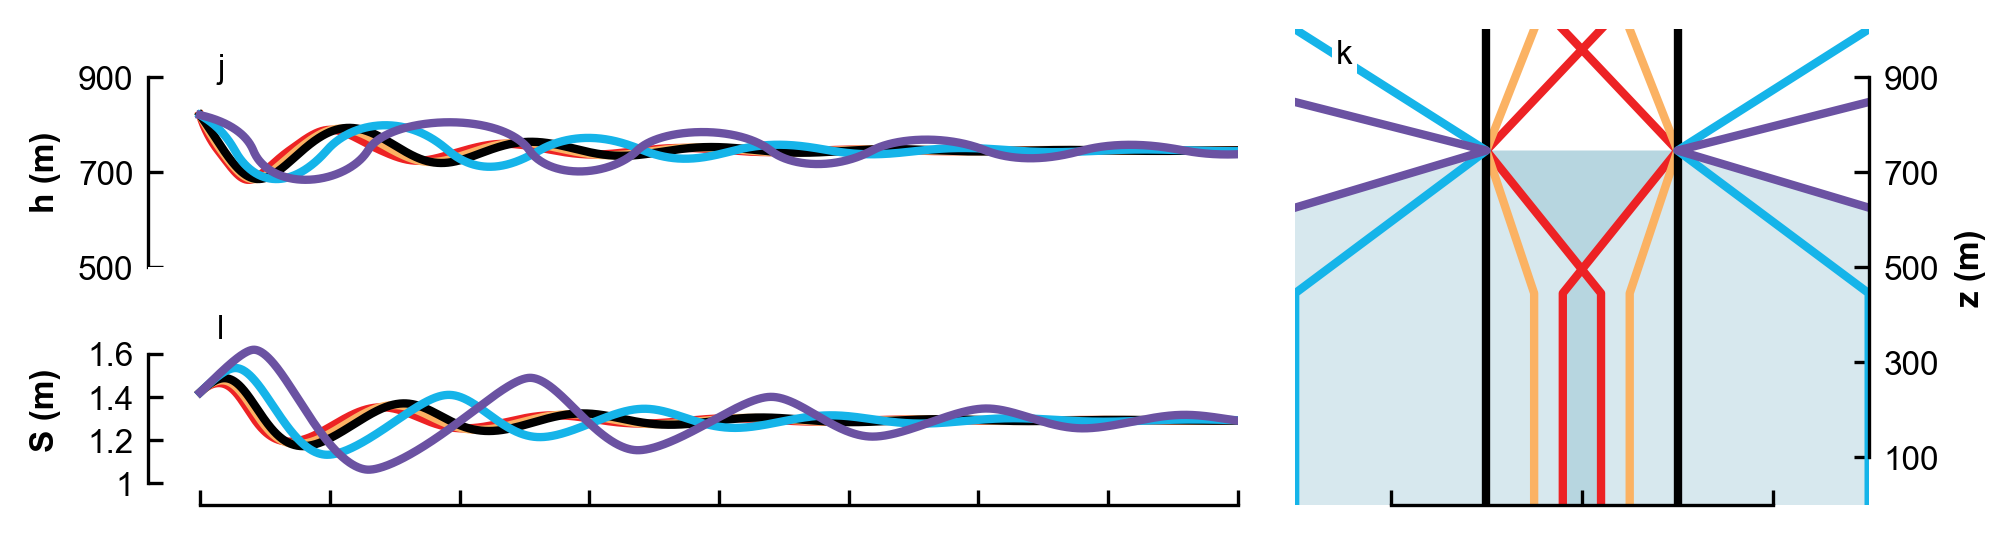

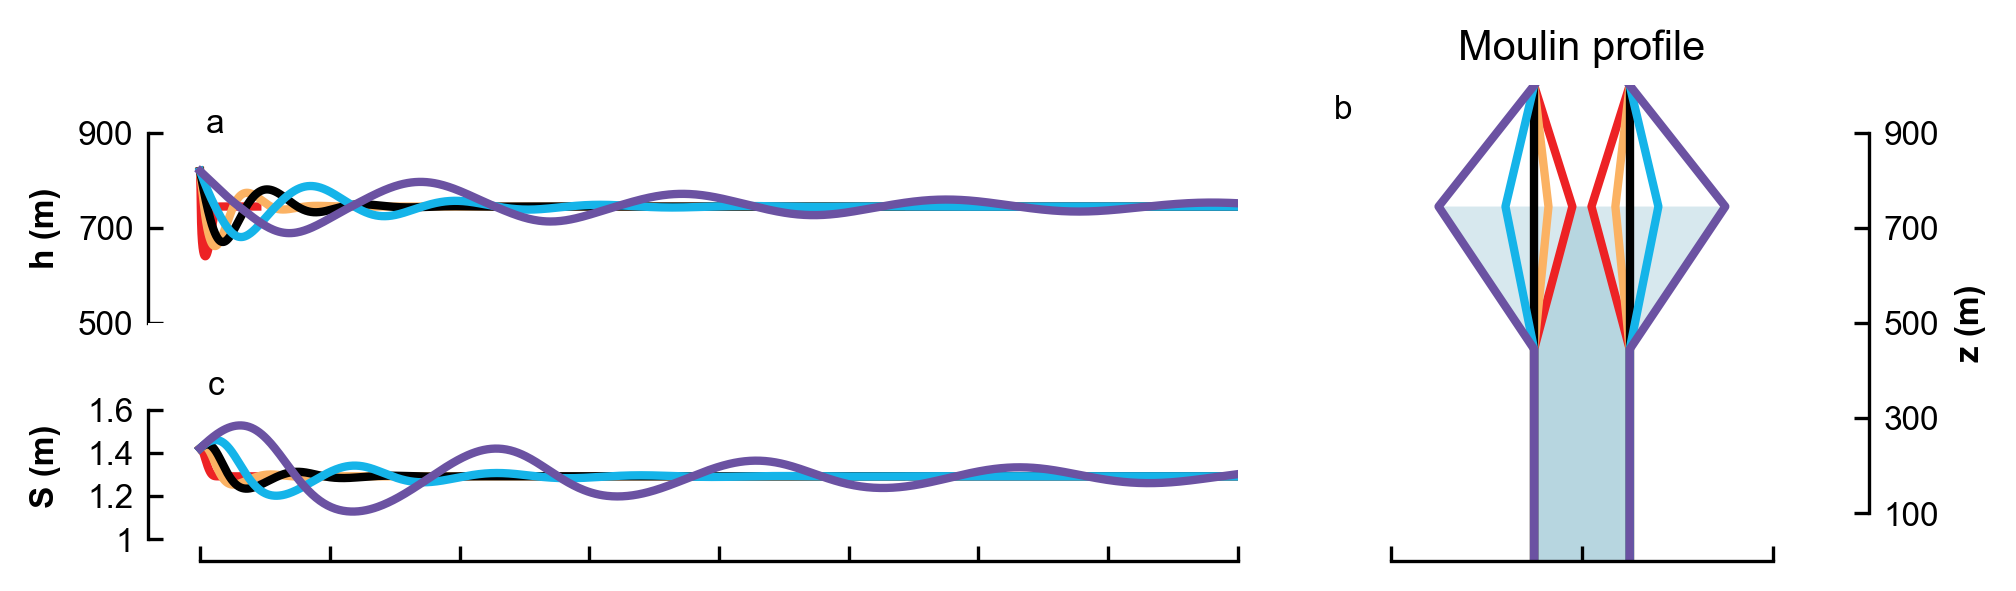

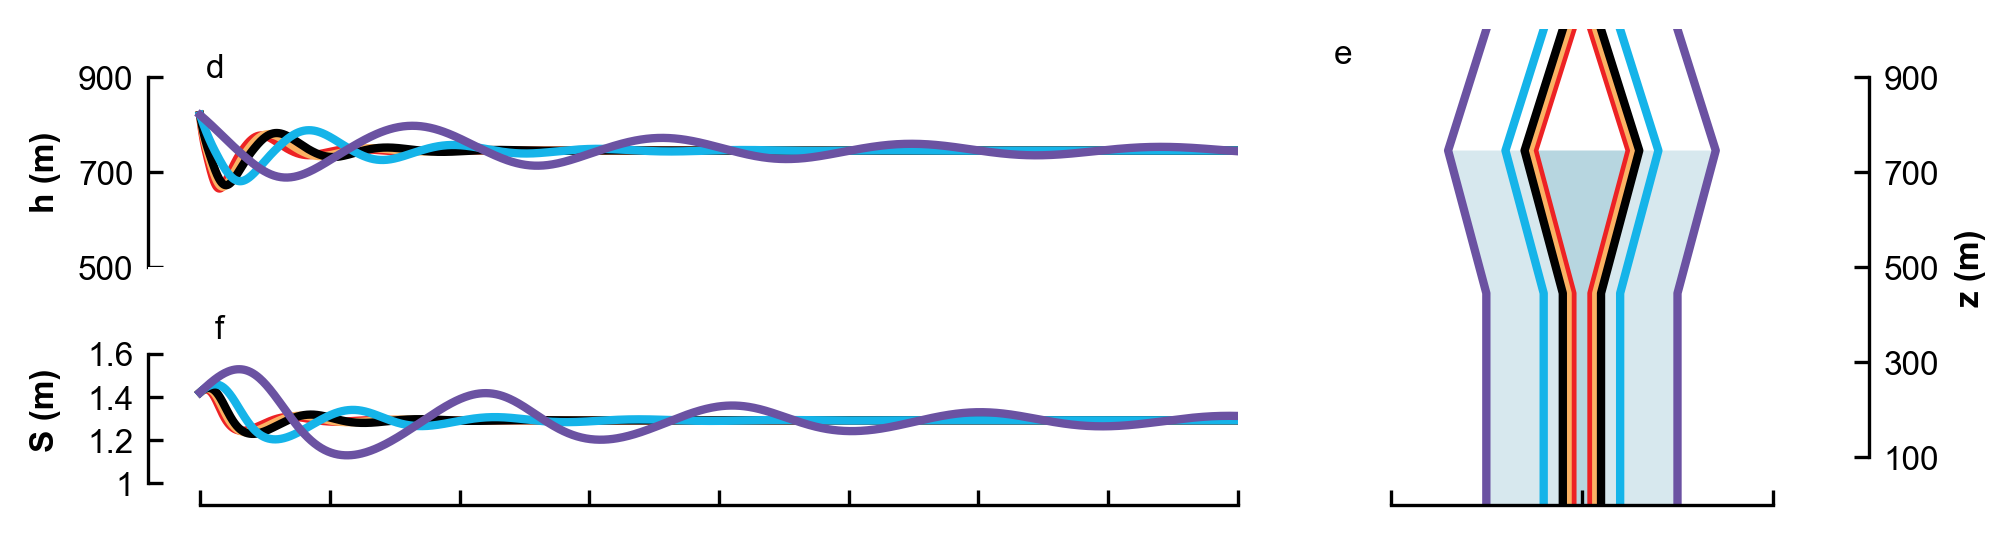

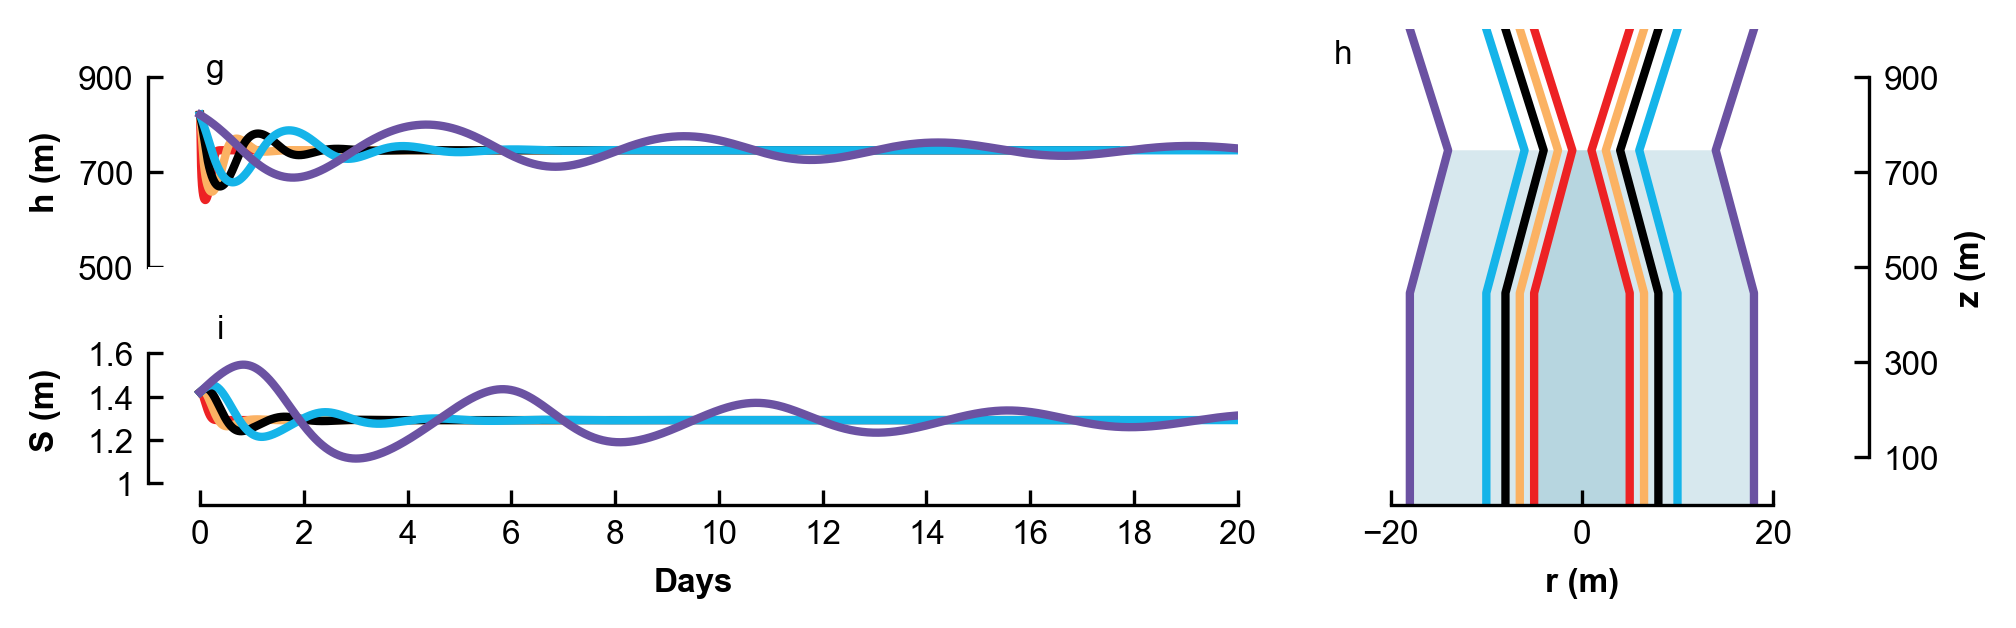

In [22]:

#%%
reslist_cylinder = [] # Create empty list
for r in [5,7.5,10,12.5,15]:
    resdic = frplus.calc_sim(shape = 'linear', r_fix=r)
    reslist_cylinder.append(resdic) # add dictionnary to the bottom of the list
frplus.plot_FR_JGR(reslist_cylinder,position='top')    

plt.savefig('Figures/FR_cylinder.pdf')


reslist_H2 = [] # Create empty list
for m in [-0.02,
          -0.01,
          0,
          0.01,
          0.02]:
    resdic = frplus.calc_sim(shape = 'linear', r_fix=10,m=m,z_fix='H2')
    reslist_H2.append(resdic) # add dictionnary to the bottom of the list
frplus.plot_FR_JGR(reslist_H2,letter=['d','e','f'],position='middle')  

plt.savefig('Figures/FR_H2.pdf')
 

reslist_heq = [] # Create empty list
for m in [-0.06,
          -0.03,
          0,
          0.03,
          0.06]:
    resdic = frplus.calc_sim(shape = 'linear', r_fix=10, m=m,z_fix='heq')
    reslist_heq.append(resdic) # add dictionnary to the bottom of the list
frplus.plot_FR_JGR(reslist_heq,letter=['g','h','i'],position='middle')

plt.savefig('Figures/FR_heq.pdf')


reslist_losange = [] # Create empty list
for r2 in [1,2,5,10,19]:
    resdic = frplus.calc_sim(shape = 'nodes',
                             dh_below = 300,
                             r0 = r2, 
                             r_min = r2, 
                             r_heq = 5,
                             r_top = r2)
    reslist_losange.append(resdic) # add dictionnary to the bottom of the list
frplus.plot_FR_JGR(reslist_losange,letter=['j','k','l'],shape='nodes',position='middle')

plt.savefig('Figures/FR_losange.pdf')

reslist_losange_bis = [] # Create empty list
for r2 in [0,5,10,20,30]:
    resdic = frplus.calc_sim(shape = 'nodes',
                             dh_below = 300,
                             r0 = r2, 
                             r_min = r2, 
                             r_heq = 10,
                             r_top = r2)
    reslist_losange_bis.append(resdic) # add dictionnary to the bottom of the list
frplus.plot_FR_JGR(reslist_losange_bis,letter=['j','k','l'],shape='nodes',position='middle')

plt.savefig('Figures/FR_losange_bis.pdf')

reslist_losange_bisbis = [] # Create empty list
for r2 in [-2,5,10,30,60]:
    resdic = frplus.calc_sim(shape = 'nodes',
                             dh_below = 300,
                             r0 = r2, 
                             r_min = r2, 
                             r_heq = 10,
                             r_top = r2)
    reslist_losange_bisbis.append(resdic) # add dictionnary to the bottom of the list
frplus.plot_FR_JGR(reslist_losange_bisbis,letter=['j','k','l'],shape='nodes',position='middle')

plt.savefig('Figures/FR_losange_bisbis.pdf')

reslist_losange2 = [] # Create empty list
for r2 in [1,3.5,5,8,15]:
    resdic = frplus.calc_sim(shape = 'nodes',
                             dh_below = 300,
                             r0 = 5, 
                             r_min = 5, 
                             r_heq = r2,
                             r_top = 5)
    reslist_losange2.append(resdic) # add dictionnary to the bottom of the list
frplus.plot_FR_JGR(reslist_losange2,letter=['a','b','c'],shape='nodes',position='top')

plt.savefig('Figures/FR_losange2.pdf')

reslist_diamond = [] # Create empty list
for r2 in [1,1.5,2,4,10]:
    resdic = frplus.calc_sim(shape = 'nodes',
                             dh_below = 300,
                             r0 = r2, 
                             r_min = r2, 
                             r_heq = r2+4,
                             r_top = r2)
    reslist_diamond.append(resdic) # add dictionnary to the bottom of the list
frplus.plot_FR_JGR(reslist_diamond,letter=['d','e','f'],shape='nodes',position='middle')

plt.savefig('Figures/FR_diamond.pdf')

reslist_hourglass = [] # Create empty list
for r2 in [5,6.5,8,10,18]:
    resdic = frplus.calc_sim(shape = 'nodes',
                             dh_below = 300,
                             r0 = r2, 
                             r_min = r2, 
                             r_heq = r2-4,
                             r_top = r2)
    reslist_hourglass.append(resdic) # add dictionnary to the bottom of the list
frplus.plot_FR_JGR(reslist_hourglass,letter=['g','h','i'],shape='nodes',position='bottom')

plt.savefig('Figures/FR_hourglass.pdf')




In [8]:
#%%
tau_damp = np.ones(len(reslist_cylinder))
tau_osc = np.ones(len(reslist_cylinder))
A = np.ones(len(reslist_cylinder))
phi = np.ones(len(reslist_cylinder))
for i in np.arange(len(reslist_cylinder)):
    tau_damp[i] = reslist_cylinder[i]['damping_fit']
    tau_osc[i] = reslist_cylinder[i]['oscillation_fit']
    A[i] = reslist_cylinder[i]['Cst_fit']
    phi[i] = reslist_cylinder[i]['phi_fit']
df = pd.DataFrame({'plot color':['red','yellow','black','blue','purple'],
                   'radius':[5,7.5,10,12.5,15],
                   'tau_damp':np.round(tau_damp,2),'tau_osc':np.round(tau_osc,2),'A':np.round(A,2),'phi':np.round(phi,2)})
print(df.to_latex(index=False))  


for i in np.arange(len(reslist_H2)):
    tau_damp[i] = reslist_H2[i]['damping_fit']
    tau_osc[i] = reslist_H2[i]['oscillation_fit']
    A[i] = reslist_H2[i]['Cst_fit']
    phi[i] = reslist_H2[i]['phi_fit']
df = pd.DataFrame({'plot color':['red','yellow','black','blue','purple'],
                   'm':[-0.02,-0.01,0,0.01,0.02],
                   'tau_damp':np.round(tau_damp,2),'tau_osc':np.round(tau_osc,2),'A':np.round(A,2),'phi':np.round(phi,2)})
print(df.to_latex(index=False))  


for i in np.arange(len(reslist_heq)):
    tau_damp[i] = reslist_heq[i]['damping_fit']
    tau_osc[i] = reslist_heq[i]['oscillation_fit']
    A[i] = reslist_heq[i]['Cst_fit']
    phi[i] = reslist_heq[i]['phi_fit']
df = pd.DataFrame({'plot color':['red','yellow','black','blue','purple'],
                   'm':[-0.06,-0.03,0,0.03,0.06],
                   'tau_damp':np.round(tau_damp,2),'tau_osc':np.round(tau_osc,2),'A':np.round(A,2),'phi':np.round(phi,2)})
print(df.to_latex(index=False))  

\begin{tabular}{lrrrrr}
\toprule
plot color &  radius &  tau\_damp &  tau\_osc &     A &   phi \\
\midrule
       red &     5.0 &      0.94 &     1.64 &  0.14 &  2.65 \\
    yellow &     7.5 &      2.23 &     2.53 &  0.11 &  2.49 \\
     black &    10.0 &      4.08 &     3.42 &  0.09 &  2.37 \\
      blue &    12.5 &      6.61 &     4.30 &  0.09 &  2.28 \\
    purple &    15.0 &     10.00 &     5.18 &  0.08 &  2.20 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
plot color &     m &  tau\_damp &  tau\_osc &     A &   phi \\
\midrule
       red & -0.02 &      1.18 &     1.75 &  0.12 &  2.73 \\
    yellow & -0.01 &      2.34 &     2.56 &  0.10 &  2.52 \\
     black &  0.00 &      4.08 &     3.42 &  0.09 &  2.37 \\
      blue &  0.01 &      6.53 &     4.28 &  0.09 &  2.26 \\
    purple &  0.02 &      9.87 &     5.14 &  0.09 &  2.18 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
plot color &     m &  tau\_damp &  tau\_osc &     A &   phi \\
\midrule
       re

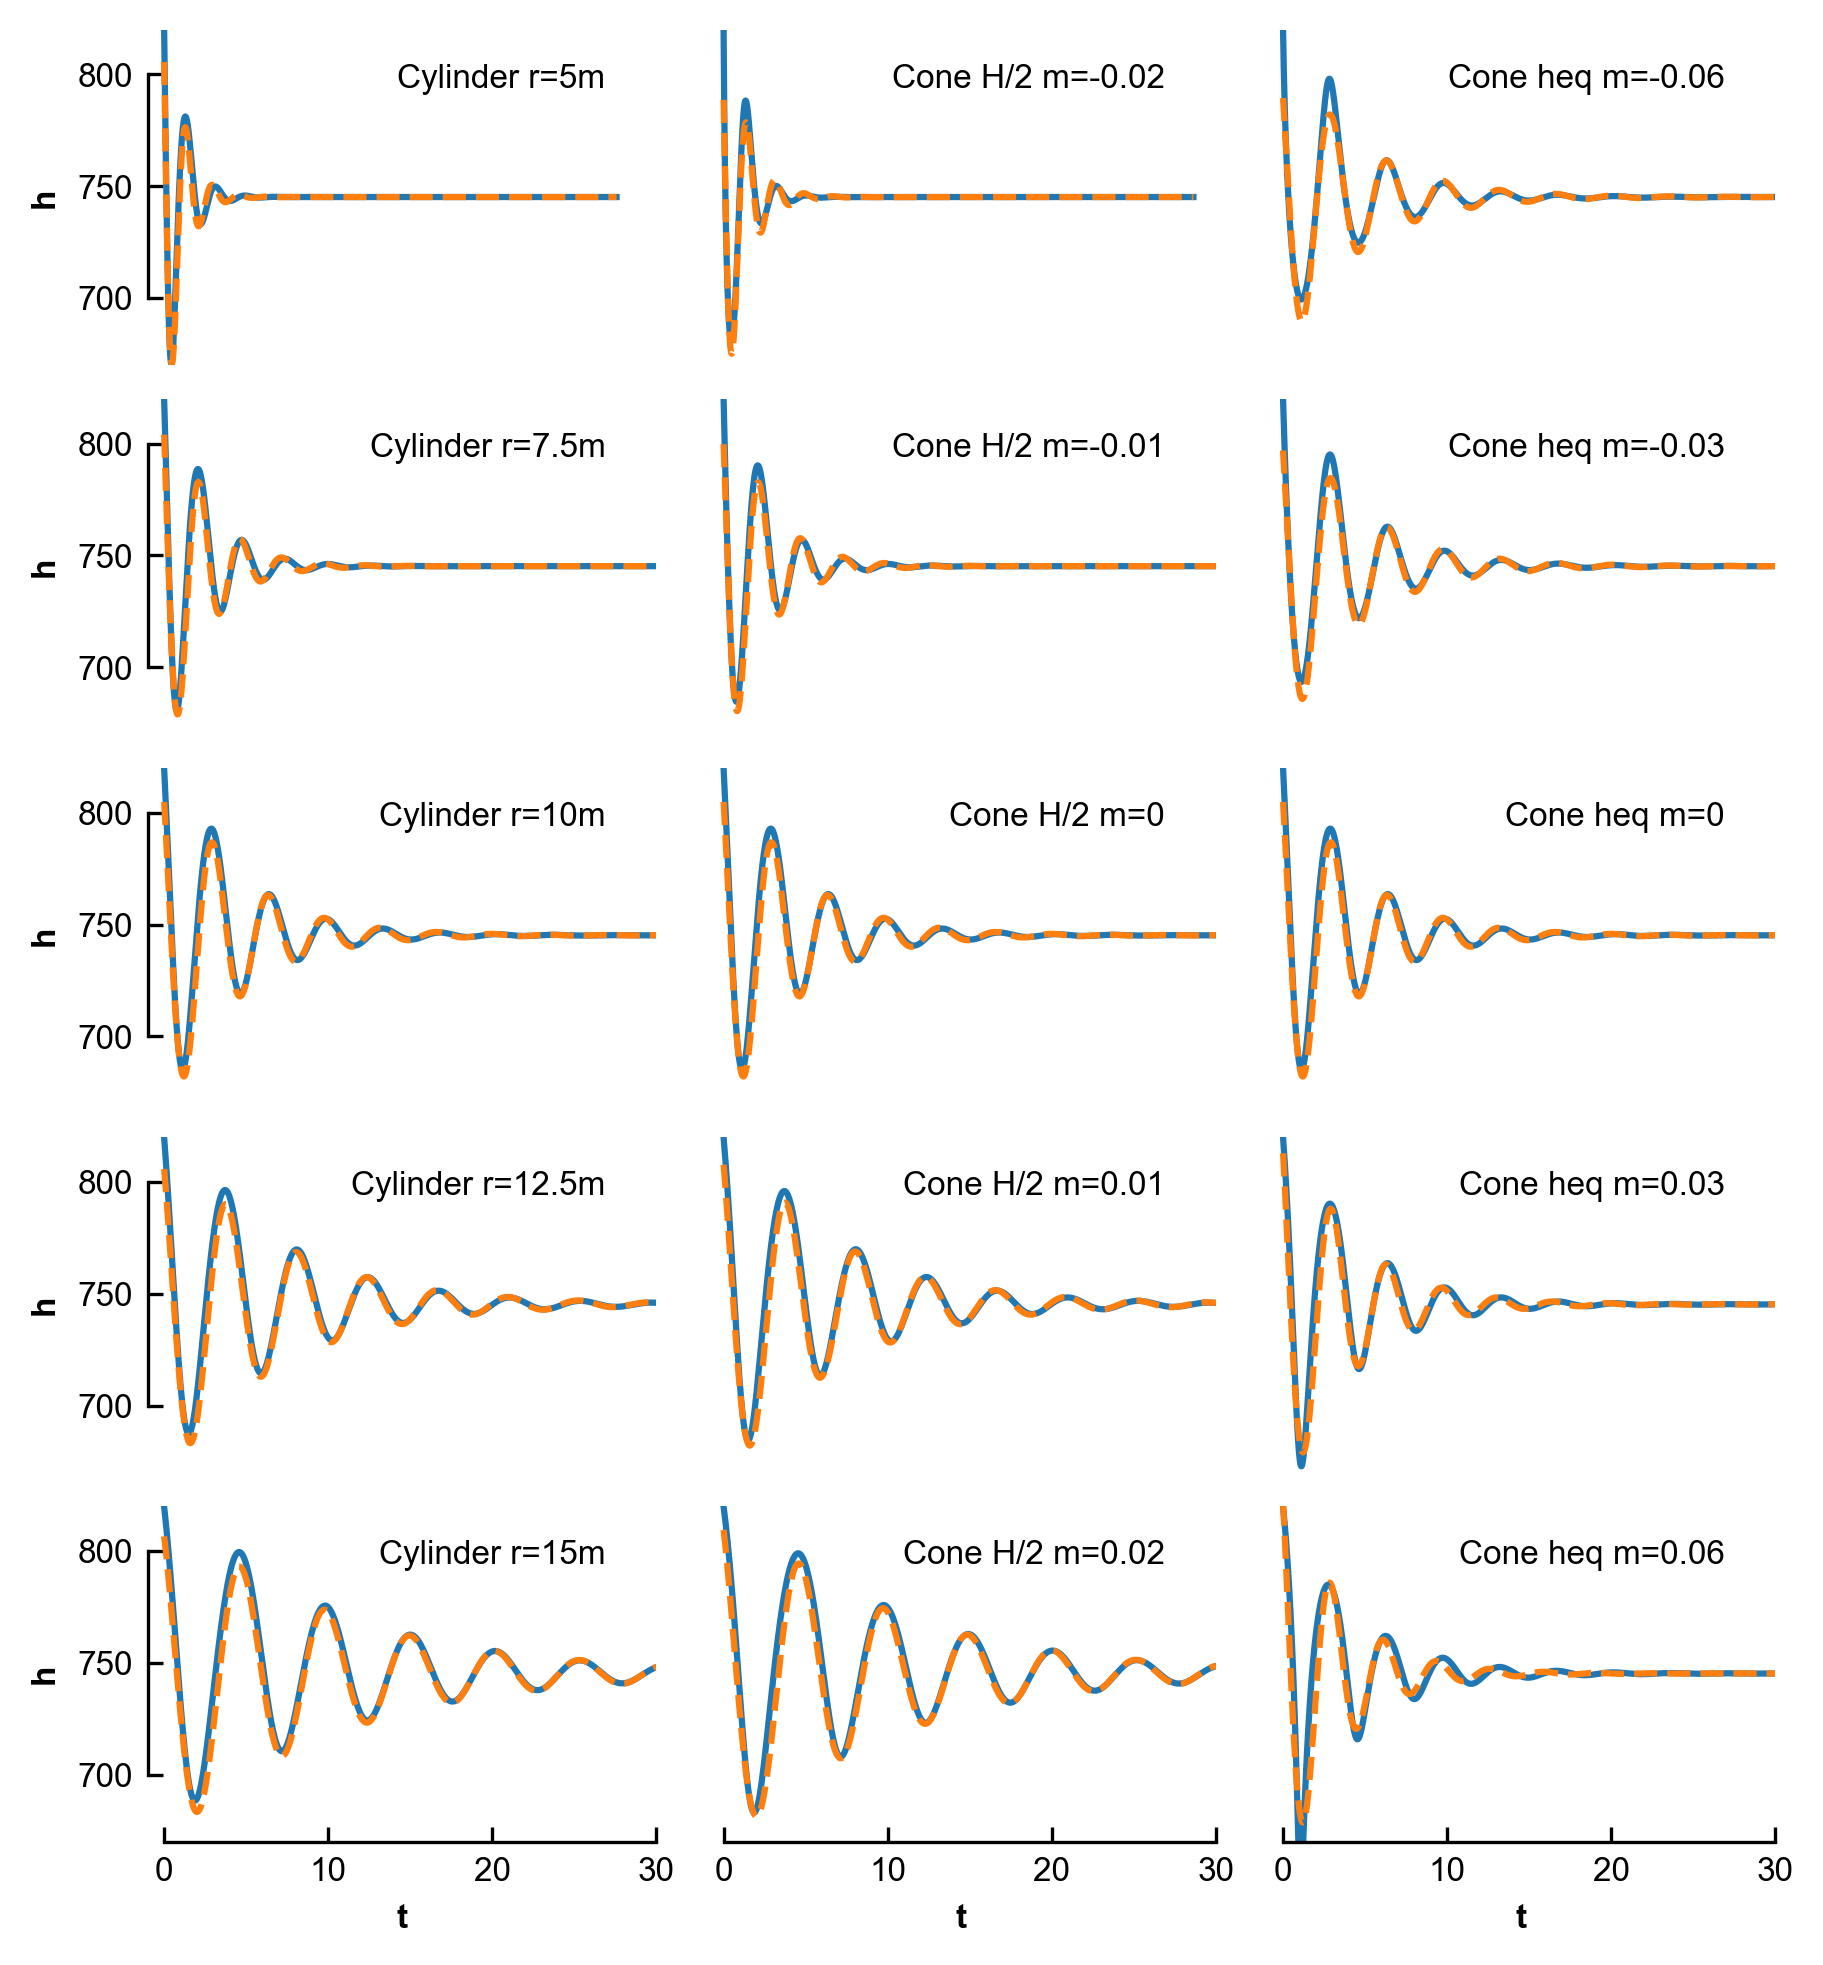

In [9]:

 



#%%

text1 = ['Cylinder r=5m','Cylinder r=7.5m','Cylinder r=10m','Cylinder r=12.5m','Cylinder r=15m']
text2 = ['Cone H/2 m=-0.02','Cone H/2 m=-0.01','Cone H/2 m=0','Cone H/2 m=0.01','Cone H/2 m=0.02']
text3 = ['Cone heq m=-0.06','Cone heq m=-0.03','Cone heq m=0','Cone heq m=0.03','Cone heq m=0.06']

plt.figure(figsize=(7,8),dpi=300)
res1 = reslist_cylinder
res2 = reslist_H2
res3 = reslist_heq
index = [1,4,7,10]
for i in [0,1,2,3]:
    ii = index[i]
  
    ax1 = plt.subplot(5,3,ii)
    plt.plot(res1[i]['td'],res1[i]['hd'],label='h')
    plt.plot(res1[i]['td'],res1[i]['hd_fit'],label='h_fit',linestyle='--')
    plt.ylabel('h')
    plt.xlim( -1,30)
    plt.ylim(670,820)
    plt.xticks([])
    plt.setp(ax1.get_xticklabels(), visible=False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_bounds(700, 800)
    ax1.tick_params(direction='in')
    
    ax2 = plt.subplot(5,3,ii+1)
    plt.plot(res2[i]['td'],res2[i]['hd'],label='h')
    plt.plot(res2[i]['td'],res2[i]['hd_fit'],label='h_fit',linestyle='--')
    plt.xlim(-1,30)
    plt.ylim(670,820)
    plt.xticks([])
    plt.yticks([])
    plt.setp(ax2.get_yticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['left'].set_bounds(700, 800)
    
    
    ax3 = plt.subplot(5,3,ii+2)
    plt.plot(res3[i]['td'],res3[i]['hd'],label='h')
    plt.plot(res3[i]['td'],res3[i]['hd_fit'],label='h_fit',linestyle='--')  
    plt.xlim(-1,30)
    plt.ylim(670,820)
    plt.xticks([])
    plt.yticks([])
    plt.setp(ax3.get_yticklabels(), visible=False)
    plt.setp(ax3.get_xticklabels(), visible=False)
    ax3.spines['right'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.spines['bottom'].set_visible(False)
    ax3.spines['left'].set_visible(False)
    ax3.spines['left'].set_bounds(700, 800)
    ax3.tick_params(direction='in')
    
    plt.subplots_adjust(hspace=0.1)
    plt.subplots_adjust(wspace=0.1)
    
    
    
    ax1.text(0.9, 0.9, text1[i], ha='right', va='top', transform=ax1.transAxes,fontsize=8, 
              bbox=dict(facecolor='white', edgecolor='none', pad=1.0))
    ax2.text(0.9, 0.9, text2[i], ha='right', va='top', transform=ax2.transAxes,fontsize=8, 
              bbox=dict(facecolor='white', edgecolor='none', pad=1.0))
    ax3.text(0.9, 0.9, text3[i], ha='right', va='top', transform=ax3.transAxes,fontsize=8, 
              bbox=dict(facecolor='white', edgecolor='none', pad=1.0))

for i in [4]:
    ii = 13
  
    ax1 = plt.subplot(5,3,ii)
    plt.plot(res1[i]['td'],res1[i]['hd'],label='h')
    plt.plot(res1[i]['td'],res1[i]['hd_fit'],label='h_fit',linestyle='--')
    plt.ylabel('h')
    plt.xlabel('t')
    plt.xlim( -1,30)
    plt.ylim(670,820)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_bounds(700, 800)
    ax1.spines['bottom'].set_bounds(0, 30)
    ax1.tick_params(direction='in')
    
    ax2 = plt.subplot(5,3,ii+1)
    plt.plot(res2[i]['td'],res2[i]['hd'],label='h')
    plt.plot(res2[i]['td'],res2[i]['hd_fit'],label='h_fit',linestyle='--')
    plt.xlabel('t')
    plt.xlim(-1,30)
    plt.ylim(670,820)
    plt.yticks([])
    plt.setp(ax2.get_yticklabels(), visible=False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['left'].set_bounds(700, 800)
    ax2.tick_params(direction='in')
    ax2.spines['bottom'].set_bounds(0, 30)
    
    ax3 = plt.subplot(5,3,ii+2)
    plt.plot(res3[i]['td'],res3[i]['hd'],label='h')
    plt.plot(res3[i]['td'],res3[i]['hd_fit'],label='h_fit',linestyle='--') 
    plt.xlabel('t')
    plt.xlim(-1,30)
    plt.ylim(670,820)
    plt.yticks([])
    plt.setp(ax3.get_yticklabels(), visible=False)

    ax3.spines['right'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.spines['left'].set_visible(False)
    ax3.spines['left'].set_bounds(700, 800)
    ax3.tick_params(direction='in')
    ax3.spines['bottom'].set_bounds(0, 30)
    
    ax1.text(0.9, 0.9, text1[i], ha='right', va='top', transform=ax1.transAxes,fontsize=8, 
              bbox=dict(facecolor='white', edgecolor='none', pad=1.0))
    ax2.text(0.9, 0.9, text2[i], ha='right', va='top', transform=ax2.transAxes,fontsize=8, 
              bbox=dict(facecolor='white', edgecolor='none', pad=1.0))
    ax3.text(0.9, 0.9, text3[i], ha='right', va='top', transform=ax3.transAxes,fontsize=8, 
              bbox=dict(facecolor='white', edgecolor='none', pad=1.0))
    
    
            
plt.savefig('Figures/FR_compare_Fit.pdf')        
    

In [10]:
#%%
reslist_profile_cylinder = []
for r in [5,7.5,10,12.5,15]:
    for L in np.arange(1000,61000,1000):
        resdic = fr.calc_sim(r_fix=r,L=L,profile=True)
        reslist_profile_cylinder.append(resdic)
        
reslist_profile_H2 = []
for m in [-0.02,
          -0.01,
          0,
          0.01,
          0.02]:
    for L in np.arange(1000,61000,1000):
        resdic = fr.calc_sim(r_fix=10,m=m,L=L,profile=True,z_fix='H2')
        reslist_profile_H2.append(resdic)

reslist_profile_heq = []
for m in [-0.06,
          -0.03,
          0,
          0.03,
          0.06]:
    for L in np.arange(1000,61000,1000):
        resdic = fr.calc_sim(r_fix=10,m=m,L=L,profile=True,z_fix='heq')
        reslist_profile_heq.append(resdic)
        
fr.timescales_subplot(reslist_profile_cylinder,reslist_profile_H2,reslist_profile_heq)

C:\Users\celia\GitHub\ModelRepo_MoulinShapeStorage_Paper\Constant_Qin\FR_mainCode.py:193: RuntimeWarning: overflow encountered in exp
  return np.exp(alpha*t) * Cst * np.sin(beta*t + phi) + h_eq_nd
C:\Users\celia\GitHub\ModelRepo_MoulinShapeStorage_Paper\Constant_Qin\FR_mainCode.py:212: RuntimeWarning: overflow encountered in multiply
  hd_fit = hnd_fit *Pi/rhow/g
C:\Users\celia\GitHub\ModelRepo_MoulinShapeStorage_Paper\Constant_Qin\FR_mainCode.py:61: RuntimeWarning: invalid value encountered in double_scalars
  dh_dt = (1 - S**(5/4)*h**0.5)/AR #Moulin head oscillations
C:\Users\celia\GitHub\ModelRepo_MoulinShapeStorage_Paper\Constant_Qin\FR_mainCode.py:62: RuntimeWarning: invalid value encountered in double_scalars
  dS_dt = T1*S**(5/4)*h**(3/2) - T2*S*(1-h)**3 #Channel creep and closure
C:\Users\celia\anaconda3\lib\site-packages\scipy\integrate\_ode.py:1350: UserWarning: lsoda: Excess accuracy requested (tolerances too small).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name

ValueError: array must not contain infs or NaNs

# Profile
###  Plot Equilibrium head (h_eq) vs distance from Margin, for a varying Recharge

In [ ]:
with open('Pickled_results/results_Profil_heq_withVariousR_AGU19','rb') as file:
   reslist = pickle.load(file)
with open('Pickled_results/param_Profil_heq_withVariousR_AGU19','rb') as file:
   paramlist = pickle.load(file)

variable_name = 'h_eq_d'
changing_param = 'R'

fig, ax = plt.subplots(figsize=(3.8,2),dpi=300)#, tight_layout=True)
n_lines = len(paramlist[changing_param])
color_idx = np.linspace(0, 0.8, n_lines)

profile = paramlist['L_profile']
profile = np.insert(profile,0,0)

for param, i in zip(paramlist[changing_param],color_idx): 
    
    timescale = np.array ([ result[variable_name] 
                           for result in reslist 
                           if result[changing_param] == param]) 
    timescale =np.insert(timescale,0,0)
    icesheet_profile = np.array ([ result['z'] 
                           for result in reslist 
                           if result[changing_param] == param])
    icesheet_profile = np.insert(icesheet_profile,0,0)
    
    lines = plt.plot(profile/1000,timescale,color=plt.cm.gray(i), lw=1.5, label='$=$%s'%param)
    
    
    legend=plt.legend(title="Recharge ($m^3/s$)",fontsize=6)
    legend.get_title().set_fontsize('6') #legend 'Title' fontsize
    
plt.plot(profile/1000,icesheet_profile,'-',color='black',lw=1.5)
plt.plot(np.linspace(0,60,10),np.zeros(10),'-',color='black',lw=1.5)

plt.plot(profile/1000,icesheet_profile*0.9,'-.',color='black',lw=1.5)

plt.subplots_adjust(left=0.15, right=0.98, top=0.95, bottom=0.2)
plt.ylabel('Elevation from bed (m)')
plt.xlabel('Distance from margin (km)')

plt.minorticks_on()

plt.savefig('Figures/ChannelHydraulic.pdf')